In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit

In [41]:
data = pd.read_table("g1a.snap_092_dm_particles.klaus",sep='\s+',skiprows=1,
                     header=None,names=['x','y','z','vx','vy','vz'])

In [42]:
data.head()

,x,y,z,vx,vy,vz
0,-2618.6616,2029.4607,-1232.1744,-450.86899,761.49188,103.506860
1,-2569.7881,2016.9364,-1355.1530,973.79175,211.47600,234.190540
2,-2588.4331,1727.2485,-1465.8170,1171.68990,142.06020,-2.163644
3,-2591.0120,1809.4641,-1545.0443,1578.01060,-1231.04200,606.012940
4,-2973.0068,1074.5974,-1284.0425,771.54156,-737.46881,622.242980


In [43]:
data.shape

(1188528, 6)

# 3D density of dm-particles

In [44]:
N_per_bin=10000
indices = np.arange(0,data.shape[0],N_per_bin)

In [45]:
data['r2d'] = np.sqrt(data['x']**2+data['y']**2)
data['r3d'] = np.sqrt(data['x']**2+data['y']**2+data['z']**2)

data.sort_values(by=['r3d'], ascending=True, inplace=True)
data=data.reset_index()

In [46]:
rbins3d=np.array([data.r3d[i] for i in indices])

In [47]:
rc3d = (rbins3d[:-1]+rbins3d[1:])/2.
volume = 4./3.*np.pi*(rbins3d[1:]**3-rbins3d[:-1]**3)

In [48]:
rho3d = N_per_bin/volume

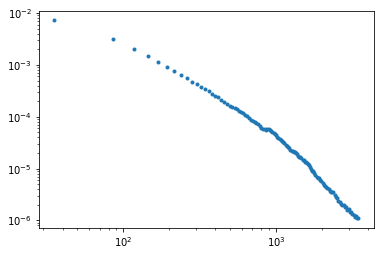

In [49]:
plt.loglog(rc3d,rho3d,'.')

In [50]:
def NFW(x, rho0, rs):
    _x = x/rs
    return rho0/_x/(1.+_x)**2

In [51]:
NFWfit, pcov = curve_fit(NFW, rc3d, rho3d)

In [52]:
NFWfit

array([3.73655719e-04, 7.62098110e+02])

Text(0, 0.5, 'density, arb units')

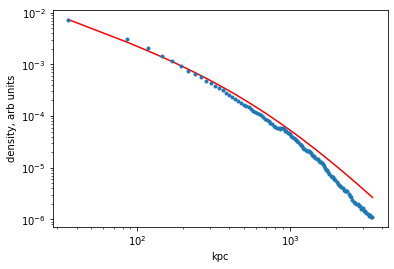

In [53]:
plt.loglog(rc3d, NFW(rc3d, *NFWfit), 'r-')

plt.loglog(rc3d,rho3d,'.')
plt.xlabel("kpc")
plt.ylabel("density, arb units")

In [54]:
mass_dm =  0.16156486 # 10^{10}solar masses

In [55]:
m_unit = 1.9890000000000001e+43
l_unit = 3.0856779999999998e+21


In [56]:
# M(r)
mass = N_per_bin*mass_dm*m_unit*np.arange(1,len(rbins3d))
av_rho = mass/(4./3. *np.pi*rbins3d[1:]**3*l_unit**3)

In [57]:
N_per_bin*(len(rbins3d)-1)

1180000

In [58]:
data[data.r3d<np.max(rbins3d)].shape

(1180000, 9)

# $\rho_{crit} = \frac{3H^2}{8\pi G}$

In [59]:
h0=0.7
rho_crit=3.*(h0*100.*1e5/3.08568e+24)**2/(8.*np.pi*6.67259e-08) #g/cm^3
print(rho_crit, "g/cm^3")

9.206218189528576e-30 g/cm^3


Text(0, 0.5, 'average density, g/cm^3')

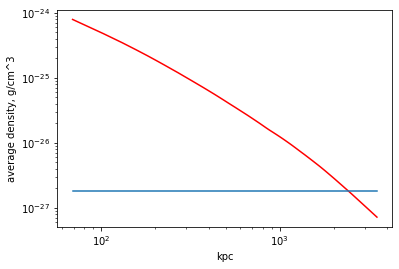

In [60]:
plt.loglog(rbins3d[1:], av_rho, 'r-')
plt.loglog(rbins3d[1:],rbins3d[1:]*0.+200.*rho_crit,'-')
plt.xlabel("kpc")
plt.ylabel("average density, g/cm^3")


In [61]:
idx = np.argwhere(np.diff(np.sign(av_rho-200.*rho_crit))).flatten()
print(rbins3d[idx+1])
#plt.loglog([rbins3d[idx+1],rbins3d[idx+1]],[1e-28,1e-23],'--',color='black')


[2398.34762509]


In [62]:
r200 = rbins3d[idx+1]
M200 = mass[idx]/1.9890000000000001e+33
print(r200,M200)

[2398.34762509] [1.58333563e+15]


(array([1.0000e+00, 1.0000e+00, 5.0000e+00, 1.8000e+01, 7.2000e+01,
        1.5500e+02, 1.3900e+02, 8.7000e+01, 5.7000e+01, 7.4000e+01,
        1.1900e+02, 1.7100e+02, 2.1100e+02, 2.9600e+02, 4.3000e+02,
        6.7000e+02, 1.0120e+03, 1.3760e+03, 1.6470e+03, 1.6590e+03,
        2.1380e+03, 2.4160e+03, 2.6620e+03, 3.1640e+03, 3.7120e+03,
        4.2860e+03, 5.2630e+03, 6.6690e+03, 7.9440e+03, 9.2220e+03,
        1.0279e+04, 1.1505e+04, 1.2843e+04, 1.4698e+04, 1.6093e+04,
        1.7043e+04, 1.8458e+04, 1.9380e+04, 2.1490e+04, 2.3445e+04,
        2.6291e+04, 2.9469e+04, 3.1775e+04, 3.4890e+04, 3.7095e+04,
        3.8713e+04, 4.0446e+04, 4.1973e+04, 4.3806e+04, 4.3256e+04,
        4.2596e+04, 4.2622e+04, 4.2337e+04, 4.1159e+04, 4.0019e+04,
        3.6965e+04, 3.5134e+04, 3.2802e+04, 3.0959e+04, 2.8036e+04,
        2.5456e+04, 2.3188e+04, 2.1274e+04, 1.9228e+04, 1.7118e+04,
        1.4916e+04, 1.3204e+04, 1.1798e+04, 1.0647e+04, 9.8100e+03,
        9.0870e+03, 8.7010e+03, 7.2550e+03, 6.02

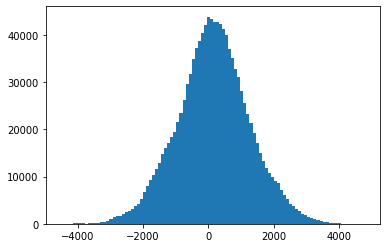

In [63]:
plt.hist(data['vz'],bins=100)

In [64]:
data['vz'].mean()

157.6618691358686

In [65]:
data['vz'].std()

1102.9393517244698

In [66]:
G = 4.302e-3 #pc/Msun (km/s)^2

In [67]:
Mass=r200*3.*data['vz'].std()*data['vz'].std()/G/1e-3/1e15
print(Mass, "10^{15} Msun")

[2.03454006] 10^{15} Msun


# surface brightness

In [68]:
data.sort_values(by=['r2d'], ascending=True, inplace=True)
data=data.reset_index()

In [69]:
data.head()

,level_0,index,x,y,z,vx,vy,vz,r2d,r3d
0,3102,469338,-0.039760,0.349993,-36.796352,196.69960,-1865.27770,-1564.38750,0.352244,36.798038
1,95,469162,0.307617,-0.435442,-8.772147,-622.33948,-1571.97110,2467.08860,0.533140,8.788333
2,240,469219,-0.403704,-0.469535,-12.234061,1131.58720,173.82240,134.28969,0.619225,12.249722
3,5755,438366,-0.682896,-0.092948,-50.843506,843.01617,-129.27139,1005.66960,0.689193,50.848177
4,4822,471473,0.803746,-0.302996,46.247559,1415.78470,-1182.79270,1831.69360,0.858961,46.255535


In [70]:
N_per_bin=10000

indices = np.arange(0,data.shape[0],N_per_bin)


In [71]:
rbins=np.array([data.r2d[i] for i in indices])

In [72]:
rc = (rbins[:-1]+rbins[1:])/2.
area = np.pi*(rbins[1:]**2-rbins[:-1]**2)

In [73]:
SB = N_per_bin/area

Text(0.5, 1.0, 'Surface brightness profile')

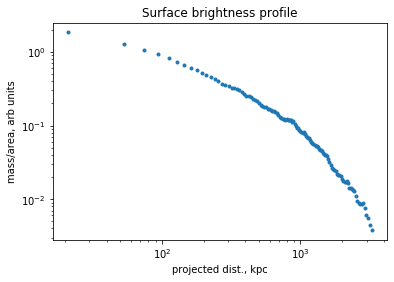

In [74]:
plt.loglog(rc,SB,'.')
plt.xlabel("projected dist., kpc")
plt.ylabel("mass/area, arb units")
plt.title("Surface brightness profile")

In [75]:
Ntotal = N_per_bin*(len(rbins)-1)
idx = np.argwhere(np.sign(N_per_bin*np.arange(1,len(rbins))-Ntotal/2)==0).flatten()
print(idx)
print(rbins[idx])


[58]
[968.4480665]


In [76]:

#idx=np.argwhere(np.diff(np.sign(N_per_bin*np.arange(1,len(rbins))-Ntotal/2))).flatten()
#idx

In [77]:
r_halfmass = rbins[idx]


# $r_{halfmass} \simeq 0.45 r_{cluster}$

In [78]:
Mass=r_halfmass/0.45*3.*data['vz'].std()*data['vz'].std()/G/1e-3/1e15
print(Mass, "10^{15} Msun")

[1.82565174] 10^{15} Msun


# Неплохо!